In [32]:
from datetime import time
import calendar

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
%matplotlib inline

In [34]:
# Set default Seaborn style
sns.set()

In [35]:
df = pd.read_csv('datasets/baseSCL2017.csv', parse_dates=['Fecha-I', 'Fecha-O'])

/home/nicolas/.virtualenvs/flights/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 19 columns):
Unnamed: 0    68206 non-null int64
Fecha-I       68206 non-null datetime64[ns]
Vlo-I         68206 non-null object
Ori-I         68206 non-null object
Des-I         68206 non-null object
Emp-I         68206 non-null object
Fecha-O       68206 non-null datetime64[ns]
Vlo-O         68205 non-null object
Ori-O         68206 non-null object
Des-O         68206 non-null object
Emp-O         68206 non-null object
DIA           68206 non-null int64
MES           68206 non-null int64
AÑO           68206 non-null int64
DIANOM        68206 non-null object
TIPOVUELO     68206 non-null object
OPERA         68206 non-null object
SIGLAORI      68206 non-null object
SIGLADES      68206 non-null object
dtypes: datetime64[ns](2), int64(4), object(13)
memory usage: 9.9+ MB


In [38]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [39]:
for col in df.columns:
    if df[col].nunique() < 100:
        df[col] = df[col].astype('category')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
Fecha-I      68206 non-null datetime64[ns]
Vlo-I        68206 non-null object
Ori-I        68206 non-null category
Des-I        68206 non-null category
Emp-I        68206 non-null category
Fecha-O      68206 non-null datetime64[ns]
Vlo-O        68205 non-null object
Ori-O        68206 non-null category
Des-O        68206 non-null category
Emp-O        68206 non-null category
DIA          68206 non-null category
MES          68206 non-null category
AÑO          68206 non-null category
DIANOM       68206 non-null category
TIPOVUELO    68206 non-null category
OPERA        68206 non-null category
SIGLAORI     68206 non-null category
SIGLADES     68206 non-null category
dtypes: category(14), datetime64[ns](2), object(2)
memory usage: 3.0+ MB


In [41]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


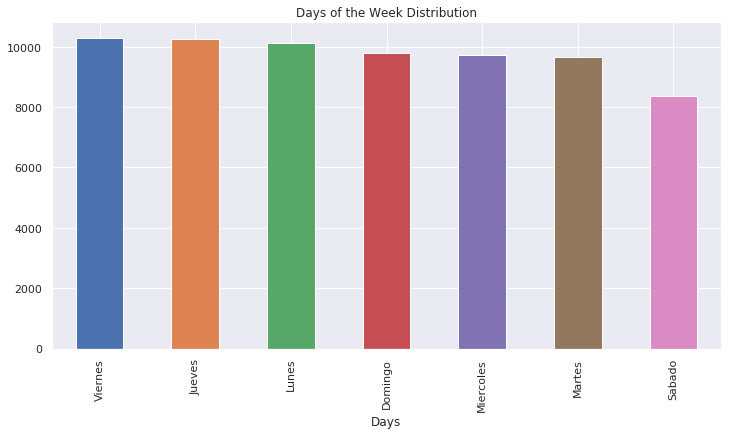

In [50]:
_ = plt.figure(figsize=(12,6))
_ = df['DIANOM'].value_counts().plot(kind='bar')
_ = plt.xlabel('Days')
_ = plt.title('Days of the Week Distribution')

In [74]:
df.set_index('Fecha-I', inplace=True)

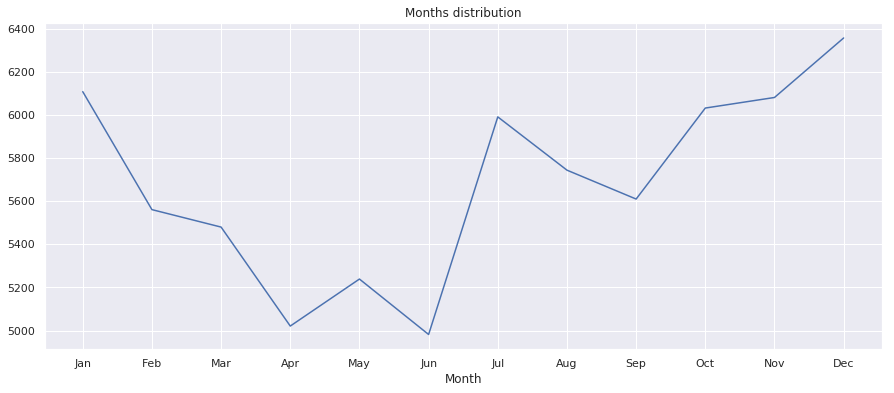

In [90]:
month_dist = df.groupby(df.index.month).count()['DIA']
month_names = [calendar.month_abbr[i] for i in month_dist.index]
_ = plt.figure(figsize=(15, 6))
_ = plt.plot(month_dist)
_ = plt.title('Months distribution')
_ = plt.xlabel('Month')
_ = plt.xticks(month_dist.index, month_names)

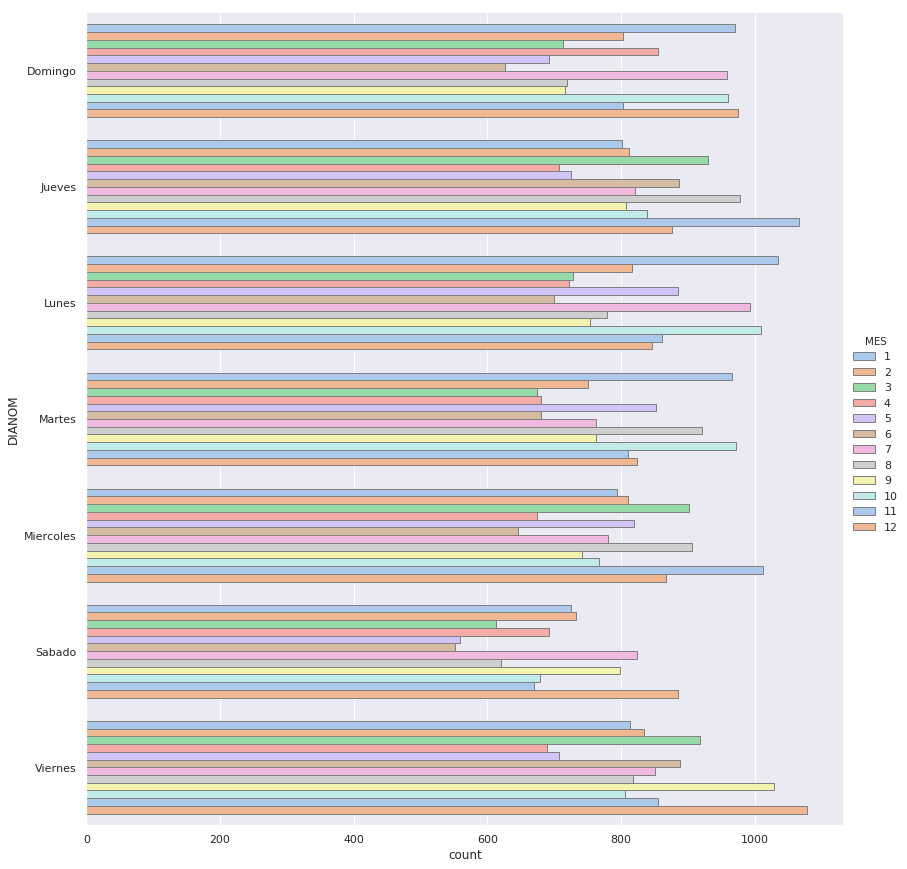

In [73]:
_ = sns.catplot(y="DIANOM", 
                hue="MES",
                kind="count", 
                palette="pastel", 
                edgecolor=".5", 
                height=12,
                data=df)

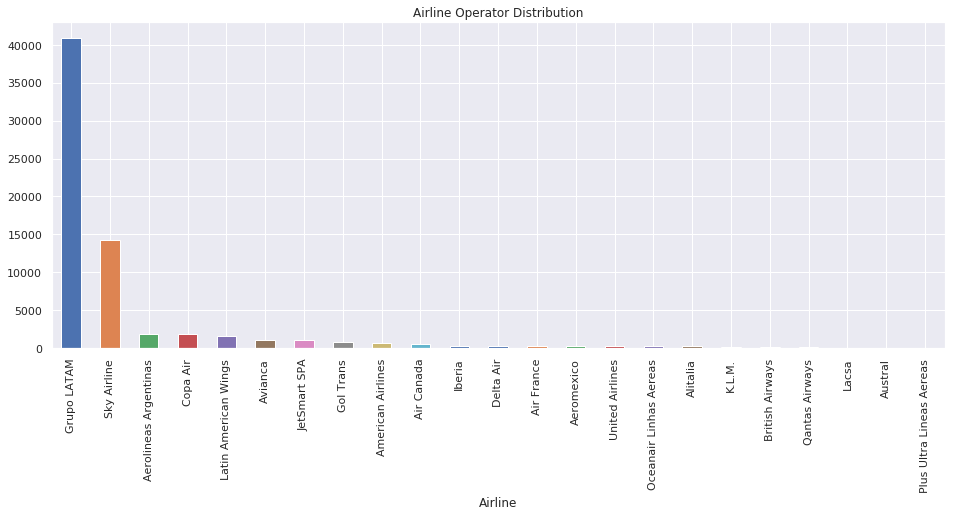

In [53]:
_ = plt.figure(figsize=(16,6))
_ = df['OPERA'].value_counts().plot(kind='bar')
_ = plt.xlabel('Airline')
_ = plt.title('Airline Operator Distribution')

In [11]:
df['Ori-I'].value_counts()

SCEL    68206
Name: Ori-I, dtype: int64

In [12]:
len(df[df['Fecha-O'] > df['Fecha-I']])

45507

In [13]:
df['TIPOVUELO'].value_counts()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

In [14]:
df['SIGLAORI'].value_counts()

Santiago    68206
Name: SIGLAORI, dtype: int64

In [18]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

In [24]:
def get_period(row):
    if time(5, 0, 0) <= row['Fecha-I'].time() <= time(11, 59, 0):
        return 'morning'
    elif time(12, 0, 0) <= row['Fecha-I'].time() <= time(18, 59, 0):
        return 'afternoon'
    else:
        return 'night'

In [25]:
df['day_period'] = df.apply(lambda row: get_period(row), axis=1)

In [26]:
df['day_period'].value_counts()

afternoon    25506
morning      25352
night        17348
Name: day_period, dtype: int64

In [30]:
df['DIANOM'] = df['DIANOM'].astype(str) 